In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

# DECISION TREE ALGORITMASI

In [2]:
banka = pd.read_csv ("hmelq.csv")
df = banka.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [3]:
dms = pd.get_dummies(df[['reason','job']])
dms.head()

,reason_DebtCon,reason_HomeImp,job_Mgr,job_Office,job_Other,job_ProfEx,job_Sales,job_Self
153,1,0,1,0,0,0,0,0
154,1,0,1,0,0,0,0,0
155,1,0,1,0,0,0,0,0
156,0,1,1,0,0,0,0,0
157,1,0,1,0,0,0,0,0


In [4]:
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis =1)
X = pd.DataFrame(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [5]:
from sklearn.tree import DecisionTreeClassifier

In [6]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [7]:
cart_model

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9224422442244224

In [9]:
print (classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       554
           1       0.56      0.48      0.52        52

    accuracy                           0.92       606
   macro avg       0.75      0.72      0.74       606
weighted avg       0.92      0.92      0.92       606



In [10]:
cart_grid = {"max_depth": range(1,10), "min_samples_split": list(range(2,50))}

In [11]:
cart_ = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV (cart, cart_grid, cv=10, n_jobs = -1, verbose =2)    # n_jobs paralel işlem yap demek
cart_cv_model =cart_cv.fit (X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 1314 tasks      | elapsed:   24.9s
[Parallel(n_jobs=-1)]: Done 3344 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 4320 out of 4320 | elapsed:  1.4min finished


In [12]:
print("En iyi parametreler:" + str(cart_cv_model.best_params_))

En iyi parametreler:{'max_depth': 8, 'min_samples_split': 3}


In [13]:
cart_ = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV (cart, cart_grid, cv=10, n_jobs = 1, verbose =2)
cart_cv_model =cart_cv.fit (X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] .......

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s



[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=2 ................................
[CV] ................. max_depth=1, min_samples_split=2, total=   0.0s
[CV] max_depth=1, min_samples_split=3 ................................
[CV] ................. max_depth=1, min_samples_split=3, total=   0.0s
[CV] max_depth=1, min_samples_split=3 ................................
[CV] ................. max_depth=1, min_samples_split=3, total=   0.0s
[CV] max_depth=1, min_samples_split=3 ................................
[CV] ................. max_depth=1, min_samples_split=3, total=   0.0s
[CV] max_depth=1, min_samples_split=3 ................................
[CV] ................. max_depth=1, min_samples_split=3, total=   0.0s
[CV] 

[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=8 ................................
[CV] ................. max_depth=1, min_samples_split=8, total=   0.0s
[CV] max_depth=1, min_samples_split=9 ................................
[CV] ................. max_depth=1, min_samples_split=9, total=   0.0s
[CV] max_depth=1, min_samples_split=9 ................................
[CV] ................. max_depth=1, min_samples_split=9, total=   0.0s
[CV] max_depth=1, min_samples_split=9 ................................
[CV] .

[CV] ................ max_depth=1, min_samples_split=14, total=   0.0s
[CV] max_depth=1, min_samples_split=14 ...............................
[CV] ................ max_depth=1, min_samples_split=14, total=   0.0s
[CV] max_depth=1, min_samples_split=14 ...............................
[CV] ................ max_depth=1, min_samples_split=14, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] ................ max_depth=1, min_samples_split=15, total=   0.0s
[CV] max_depth=1, min_samples_split=15 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=20, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] ................ max_depth=1, min_samples_split=21, total=   0.0s
[CV] max_depth=1, min_samples_split=21 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=27 ...............................
[CV] ................ max_depth=1, min_samples_split=27, total=   0.0s
[CV] max_depth=1, min_samples_split=28 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=33, total=   0.0s
[CV] max_depth=1, min_samples_split=33 ...............................
[CV] ................ max_depth=1, min_samples_split=33, total=   0.0s
[CV] max_depth=1, min_samples_split=33 ...............................
[CV] ................ max_depth=1, min_samples_split=33, total=   0.0s
[CV] max_depth=1, min_samples_split=33 ...............................
[CV] ................ max_depth=1, min_samples_split=33, total=   0.0s
[CV] max_depth=1, min_samples_split=34 ...............................
[CV] ................ max_depth=1, min_samples_split=34, total=   0.0s
[CV] max_depth=1, min_samples_split=34 ...............................
[CV] ................ max_depth=1, min_samples_split=34, total=   0.0s
[CV] max_depth=1, min_samples_split=34 ...............................
[CV] ................ max_depth=1, min_samples_split=34, total=   0.0s
[CV] max_depth=1, min_samples_split=34 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=39, total=   0.0s
[CV] max_depth=1, min_samples_split=39 ...............................
[CV] ................ max_depth=1, min_samples_split=39, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] ................ max_depth=1, min_samples_split=40, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] ................ max_depth=1, min_samples_split=40, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] ................ max_depth=1, min_samples_split=40, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] ................ max_depth=1, min_samples_split=40, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] ................ max_depth=1, min_samples_split=40, total=   0.0s
[CV] max_depth=1, min_samples_split=40 ...............................
[CV] .

[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] ................ max_depth=1, min_samples_split=46, total=   0.0s
[CV] max_depth=1, min_samples_split=46 ...............................
[CV] .

[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] max_depth=2, min_samples_split=4 ................................
[CV] ................. max_depth=2, min_samples_split=4, total=   0.0s
[CV] m

[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=10 ...............................
[CV] ................ max_depth=2, min_samples_split=10, total=   0.0s
[CV] max_depth=2, min_samples_split=11 ...............................
[CV] ................ max_depth=2, min_samples_split=11, total=   0.0s
[CV] m

[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.1s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=16 ...............................
[CV] ................ max_depth=2, min_samples_split=16, total=   0.0s
[CV] max_depth=2, min_samples_split=17 ...............................
[CV] .

[CV] max_depth=2, min_samples_split=22 ...............................
[CV] ................ max_depth=2, min_samples_split=22, total=   0.0s
[CV] max_depth=2, min_samples_split=22 ...............................
[CV] ................ max_depth=2, min_samples_split=22, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] max_depth=2, min_samples_split=23 ...............................
[CV] ................ max_depth=2, min_samples_split=23, total=   0.0s
[CV] m

[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] ................ max_depth=2, min_samples_split=29, total=   0.0s
[CV] max_depth=2, min_samples_split=29 ...............................
[CV] .

[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] max_depth=2, min_samples_split=35 ...............................
[CV] ................ max_depth=2, min_samples_split=35, total=   0.0s
[CV] m

[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] max_depth=2, min_samples_split=41 ...............................
[CV] ................ max_depth=2, min_samples_split=41, total=   0.0s
[CV] m

[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] ................ max_depth=2, min_samples_split=47, total=   0.0s
[CV] max_depth=2, min_samples_split=47 ...............................
[CV] .

[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=5 ................................
[CV] ................. max_depth=3, min_samples_split=5, total=   0.0s
[CV] max_depth=3, min_samples_split=6 ................................
[CV] .

[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] max_depth=3, min_samples_split=11 ...............................
[CV] ................ max_depth=3, min_samples_split=11, total=   0.0s
[CV] m

[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=17 ...............................
[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=17 ...............................
[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=17 ...............................
[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=17 ...............................
[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=17 ...............................
[CV] ................ max_depth=3, min_samples_split=17, total=   0.0s
[CV] max_depth=3, min_samples_split=18 ...............................
[CV] ................ max_depth=3, min_samples_split=18, total=   0.0s
[CV] max_depth=3, min_samples_split=18 ...............................
[CV] .

[CV] max_depth=3, min_samples_split=23 ...............................
[CV] ................ max_depth=3, min_samples_split=23, total=   0.0s
[CV] max_depth=3, min_samples_split=23 ...............................
[CV] ................ max_depth=3, min_samples_split=23, total=   0.0s
[CV] max_depth=3, min_samples_split=23 ...............................
[CV] ................ max_depth=3, min_samples_split=23, total=   0.0s
[CV] max_depth=3, min_samples_split=23 ...............................
[CV] ................ max_depth=3, min_samples_split=23, total=   0.0s
[CV] max_depth=3, min_samples_split=23 ...............................
[CV] ................ max_depth=3, min_samples_split=23, total=   0.0s
[CV] max_depth=3, min_samples_split=24 ...............................
[CV] ................ max_depth=3, min_samples_split=24, total=   0.0s
[CV] max_depth=3, min_samples_split=24 ...............................
[CV] ................ max_depth=3, min_samples_split=24, total=   0.0s
[CV] m

[CV] ................ max_depth=3, min_samples_split=29, total=   0.0s
[CV] max_depth=3, min_samples_split=29 ...............................
[CV] ................ max_depth=3, min_samples_split=29, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] ................ max_depth=3, min_samples_split=30, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] ................ max_depth=3, min_samples_split=30, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] ................ max_depth=3, min_samples_split=30, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] ................ max_depth=3, min_samples_split=30, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] ................ max_depth=3, min_samples_split=30, total=   0.0s
[CV] max_depth=3, min_samples_split=30 ...............................
[CV] .

[CV] max_depth=3, min_samples_split=35 ...............................
[CV] ................ max_depth=3, min_samples_split=35, total=   0.0s
[CV] max_depth=3, min_samples_split=35 ...............................
[CV] ................ max_depth=3, min_samples_split=35, total=   0.0s
[CV] max_depth=3, min_samples_split=36 ...............................
[CV] ................ max_depth=3, min_samples_split=36, total=   0.0s
[CV] max_depth=3, min_samples_split=36 ...............................
[CV] ................ max_depth=3, min_samples_split=36, total=   0.0s
[CV] max_depth=3, min_samples_split=36 ...............................
[CV] ................ max_depth=3, min_samples_split=36, total=   0.0s
[CV] max_depth=3, min_samples_split=36 ...............................
[CV] ................ max_depth=3, min_samples_split=36, total=   0.0s
[CV] max_depth=3, min_samples_split=36 ...............................
[CV] ................ max_depth=3, min_samples_split=36, total=   0.0s
[CV] m

[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] max_depth=3, min_samples_split=42 ...............................
[CV] ................ max_depth=3, min_samples_split=42, total=   0.0s
[CV] m

[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=48 ...............................
[CV] ................ max_depth=3, min_samples_split=48, total=   0.0s
[CV] max_depth=3, min_samples_split=49 ...............................
[CV] ................ max_depth=3, min_samples_split=49, total=   0.0s
[CV] max_depth=3, min_samples_split=49 ...............................
[CV] ................ max_depth=3, min_samples_split=49, total=   0.0s
[CV] max_depth=3, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=6 ................................
[CV] ................. max_depth=4, min_samples_split=6, total=   0.0s
[CV] max_depth=4, min_samples_split=7 ................................
[CV] ................. max_depth=4, min_samples_split=7, total=   0.0s
[CV] max_depth=4, min_samples_split=7 ................................
[CV] ................. max_depth=4, min_samples_split=7, total=   0.0s
[CV] max_depth=4, min_samples_split=7 ................................
[CV] ................. max_depth=4, min_samples_split=7, total=   0.0s
[CV] max_depth=4, min_samples_split=7 ................................
[CV] ................. max_depth=4, min_samples_split=7, total=   0.0s
[CV] max_depth=4, min_samples_split=7 ................................
[CV] .

[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=12 ...............................
[CV] ................ max_depth=4, min_samples_split=12, total=   0.0s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] ................ max_depth=4, min_samples_split=13, total=   0.0s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] ................ max_depth=4, min_samples_split=13, total=   0.0s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] ................ max_depth=4, min_samples_split=13, total=   0.0s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] ................ max_depth=4, min_samples_split=13, total=   0.0s
[CV] max_depth=4, min_samples_split=13 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.1s
[CV] max_depth=4, min_samples_split=18 ...............................
[CV] ................ max_depth=4, min_samples_split=18, total=   0.0s
[CV] max_depth=4, min_samples_split=19 ...............................
[CV] ................ max_depth=4, min_samples_split=19, total=   0.0s
[CV] max_depth=4, min_samples_split=19 ...............................
[CV] ................ max_depth=4, min_samples_split=19, total=   0.0s
[CV] max_depth=4, min_samples_split=19 ...............................
[CV] ................ max_depth=4, min_samples_split=19, total=   0.0s
[CV] max_depth=4, min_samples_split=19 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=24 ...............................
[CV] ................ max_depth=4, min_samples_split=24, total=   0.0s
[CV] max_depth=4, min_samples_split=25 ...............................
[CV] ................ max_depth=4, min_samples_split=25, total=   0.0s
[CV] max_depth=4, min_samples_split=25 ...............................
[CV] ................ max_depth=4, min_samples_split=25, total=   0.0s
[CV] max_depth=4, min_samples_split=25 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=30, total=   0.0s
[CV] max_depth=4, min_samples_split=30 ...............................
[CV] ................ max_depth=4, min_samples_split=30, total=   0.0s
[CV] max_depth=4, min_samples_split=30 ...............................
[CV] ................ max_depth=4, min_samples_split=30, total=   0.0s
[CV] max_depth=4, min_samples_split=30 ...............................
[CV] ................ max_depth=4, min_samples_split=30, total=   0.0s
[CV] max_depth=4, min_samples_split=30 ...............................
[CV] ................ max_depth=4, min_samples_split=30, total=   0.0s
[CV] max_depth=4, min_samples_split=31 ...............................
[CV] ................ max_depth=4, min_samples_split=31, total=   0.0s
[CV] max_depth=4, min_samples_split=31 ...............................
[CV] ................ max_depth=4, min_samples_split=31, total=   0.0s
[CV] max_depth=4, min_samples_split=31 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=36, total=   0.0s
[CV] max_depth=4, min_samples_split=36 ...............................
[CV] ................ max_depth=4, min_samples_split=36, total=   0.0s
[CV] max_depth=4, min_samples_split=36 ...............................
[CV] ................ max_depth=4, min_samples_split=36, total=   0.0s
[CV] max_depth=4, min_samples_split=36 ...............................
[CV] ................ max_depth=4, min_samples_split=36, total=   0.0s
[CV] max_depth=4, min_samples_split=37 ...............................
[CV] ................ max_depth=4, min_samples_split=37, total=   0.0s
[CV] max_depth=4, min_samples_split=37 ...............................
[CV] ................ max_depth=4, min_samples_split=37, total=   0.0s
[CV] max_depth=4, min_samples_split=37 ...............................
[CV] ................ max_depth=4, min_samples_split=37, total=   0.0s
[CV] max_depth=4, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=42, total=   0.0s
[CV] max_depth=4, min_samples_split=42 ...............................
[CV] ................ max_depth=4, min_samples_split=42, total=   0.0s
[CV] max_depth=4, min_samples_split=42 ...............................
[CV] ................ max_depth=4, min_samples_split=42, total=   0.0s
[CV] max_depth=4, min_samples_split=42 ...............................
[CV] ................ max_depth=4, min_samples_split=42, total=   0.0s
[CV] max_depth=4, min_samples_split=43 ...............................
[CV] ................ max_depth=4, min_samples_split=43, total=   0.0s
[CV] max_depth=4, min_samples_split=43 ...............................
[CV] ................ max_depth=4, min_samples_split=43, total=   0.0s
[CV] max_depth=4, min_samples_split=43 ...............................
[CV] ................ max_depth=4, min_samples_split=43, total=   0.0s
[CV] max_depth=4, min_samples_split=43 ...............................
[CV] .

[CV] ................ max_depth=4, min_samples_split=48, total=   0.0s
[CV] max_depth=4, min_samples_split=48 ...............................
[CV] ................ max_depth=4, min_samples_split=48, total=   0.0s
[CV] max_depth=4, min_samples_split=48 ...............................
[CV] ................ max_depth=4, min_samples_split=48, total=   0.0s
[CV] max_depth=4, min_samples_split=48 ...............................
[CV] ................ max_depth=4, min_samples_split=48, total=   0.0s
[CV] max_depth=4, min_samples_split=49 ...............................
[CV] ................ max_depth=4, min_samples_split=49, total=   0.0s
[CV] max_depth=4, min_samples_split=49 ...............................
[CV] ................ max_depth=4, min_samples_split=49, total=   0.0s
[CV] max_depth=4, min_samples_split=49 ...............................
[CV] ................ max_depth=4, min_samples_split=49, total=   0.0s
[CV] max_depth=4, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=5, min_samples_split=6, total=   0.0s
[CV] max_depth=5, min_samples_split=6 ................................
[CV] ................. max_depth=5, min_samples_split=6, total=   0.0s
[CV] max_depth=5, min_samples_split=6 ................................
[CV] ................. max_depth=5, min_samples_split=6, total=   0.0s
[CV] max_depth=5, min_samples_split=6 ................................
[CV] ................. max_depth=5, min_samples_split=6, total=   0.0s
[CV] max_depth=5, min_samples_split=7 ................................
[CV] ................. max_depth=5, min_samples_split=7, total=   0.0s
[CV] max_depth=5, min_samples_split=7 ................................
[CV] ................. max_depth=5, min_samples_split=7, total=   0.0s
[CV] max_depth=5, min_samples_split=7 ................................
[CV] ................. max_depth=5, min_samples_split=7, total=   0.0s
[CV] max_depth=5, min_samples_split=7 ................................
[CV] .

[CV] ................ max_depth=5, min_samples_split=12, total=   0.0s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ................ max_depth=5, min_samples_split=12, total=   0.0s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ................ max_depth=5, min_samples_split=12, total=   0.0s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ................ max_depth=5, min_samples_split=12, total=   0.0s
[CV] max_depth=5, min_samples_split=12 ...............................
[CV] ................ max_depth=5, min_samples_split=12, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] ................ max_depth=5, min_samples_split=13, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] ................ max_depth=5, min_samples_split=13, total=   0.0s
[CV] max_depth=5, min_samples_split=13 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=18, total=   0.0s
[CV] max_depth=5, min_samples_split=18 ...............................
[CV] ................ max_depth=5, min_samples_split=18, total=   0.0s
[CV] max_depth=5, min_samples_split=18 ...............................
[CV] ................ max_depth=5, min_samples_split=18, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] ................ max_depth=5, min_samples_split=19, total=   0.0s
[CV] max_depth=5, min_samples_split=19 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=24, total=   0.0s
[CV] max_depth=5, min_samples_split=24 ...............................
[CV] ................ max_depth=5, min_samples_split=24, total=   0.0s
[CV] max_depth=5, min_samples_split=24 ...............................
[CV] ................ max_depth=5, min_samples_split=24, total=   0.0s
[CV] max_depth=5, min_samples_split=24 ...............................
[CV] ................ max_depth=5, min_samples_split=24, total=   0.0s
[CV] max_depth=5, min_samples_split=24 ...............................
[CV] ................ max_depth=5, min_samples_split=24, total=   0.0s
[CV] max_depth=5, min_samples_split=25 ...............................
[CV] ................ max_depth=5, min_samples_split=25, total=   0.0s
[CV] max_depth=5, min_samples_split=25 ...............................
[CV] ................ max_depth=5, min_samples_split=25, total=   0.0s
[CV] max_depth=5, min_samples_split=25 ...............................
[CV] .

[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] max_depth=5, min_samples_split=30 ...............................
[CV] ................ max_depth=5, min_samples_split=30, total=   0.0s
[CV] m

[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] max_depth=5, min_samples_split=36 ...............................
[CV] ................ max_depth=5, min_samples_split=36, total=   0.0s
[CV] m

[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] ................ max_depth=5, min_samples_split=42, total=   0.0s
[CV] max_depth=5, min_samples_split=42 ...............................
[CV] .

[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=48 ...............................
[CV] ................ max_depth=5, min_samples_split=48, total=   0.0s
[CV] max_depth=5, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] ................. max_depth=6, min_samples_split=6, total=   0.0s
[CV] max_depth=6, min_samples_split=6 ................................
[CV] .

[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=12 ...............................
[CV] ................ max_depth=6, min_samples_split=12, total=   0.0s
[CV] max_depth=6, min_samples_split=13 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=18, total=   0.0s
[CV] max_depth=6, min_samples_split=18 ...............................
[CV] ................ max_depth=6, min_samples_split=18, total=   0.0s
[CV] max_depth=6, min_samples_split=18 ...............................
[CV] ................ max_depth=6, min_samples_split=18, total=   0.0s
[CV] max_depth=6, min_samples_split=18 ...............................
[CV] ................ max_depth=6, min_samples_split=18, total=   0.0s
[CV] max_depth=6, min_samples_split=19 ...............................
[CV] ................ max_depth=6, min_samples_split=19, total=   0.0s
[CV] max_depth=6, min_samples_split=19 ...............................
[CV] ................ max_depth=6, min_samples_split=19, total=   0.0s
[CV] max_depth=6, min_samples_split=19 ...............................
[CV] ................ max_depth=6, min_samples_split=19, total=   0.0s
[CV] max_depth=6, min_samples_split=19 ...............................
[CV] .

[CV] max_depth=6, min_samples_split=24 ...............................
[CV] ................ max_depth=6, min_samples_split=24, total=   0.0s
[CV] max_depth=6, min_samples_split=24 ...............................
[CV] ................ max_depth=6, min_samples_split=24, total=   0.0s
[CV] max_depth=6, min_samples_split=24 ...............................
[CV] ................ max_depth=6, min_samples_split=24, total=   0.0s
[CV] max_depth=6, min_samples_split=24 ...............................
[CV] ................ max_depth=6, min_samples_split=24, total=   0.0s
[CV] max_depth=6, min_samples_split=25 ...............................
[CV] ................ max_depth=6, min_samples_split=25, total=   0.0s
[CV] max_depth=6, min_samples_split=25 ...............................
[CV] ................ max_depth=6, min_samples_split=25, total=   0.0s
[CV] max_depth=6, min_samples_split=25 ...............................
[CV] ................ max_depth=6, min_samples_split=25, total=   0.0s
[CV] m

[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=30 ...............................
[CV] ................ max_depth=6, min_samples_split=30, total=   0.0s
[CV] max_depth=6, min_samples_split=31 ...............................
[CV] ................ max_depth=6, min_samples_split=31, total=   0.0s
[CV] max_depth=6, min_samples_split=31 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=36 ...............................
[CV] ................ max_depth=6, min_samples_split=36, total=   0.0s
[CV] max_depth=6, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=42, total=   0.0s
[CV] max_depth=6, min_samples_split=42 ...............................
[CV] ................ max_depth=6, min_samples_split=42, total=   0.0s
[CV] max_depth=6, min_samples_split=42 ...............................
[CV] ................ max_depth=6, min_samples_split=42, total=   0.1s
[CV] max_depth=6, min_samples_split=42 ...............................
[CV] ................ max_depth=6, min_samples_split=42, total=   0.0s
[CV] max_depth=6, min_samples_split=42 ...............................
[CV] ................ max_depth=6, min_samples_split=42, total=   0.0s
[CV] max_depth=6, min_samples_split=43 ...............................
[CV] ................ max_depth=6, min_samples_split=43, total=   0.0s
[CV] max_depth=6, min_samples_split=43 ...............................
[CV] ................ max_depth=6, min_samples_split=43, total=   0.0s
[CV] max_depth=6, min_samples_split=43 ...............................
[CV] .

[CV] ................ max_depth=6, min_samples_split=48, total=   0.0s
[CV] max_depth=6, min_samples_split=48 ...............................
[CV] ................ max_depth=6, min_samples_split=48, total=   0.0s
[CV] max_depth=6, min_samples_split=48 ...............................
[CV] ................ max_depth=6, min_samples_split=48, total=   0.0s
[CV] max_depth=6, min_samples_split=49 ...............................
[CV] ................ max_depth=6, min_samples_split=49, total=   0.0s
[CV] max_depth=6, min_samples_split=49 ...............................
[CV] ................ max_depth=6, min_samples_split=49, total=   0.0s
[CV] max_depth=6, min_samples_split=49 ...............................
[CV] ................ max_depth=6, min_samples_split=49, total=   0.0s
[CV] max_depth=6, min_samples_split=49 ...............................
[CV] ................ max_depth=6, min_samples_split=49, total=   0.0s
[CV] max_depth=6, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=7, min_samples_split=6, total=   0.0s
[CV] max_depth=7, min_samples_split=6 ................................
[CV] ................. max_depth=7, min_samples_split=6, total=   0.0s
[CV] max_depth=7, min_samples_split=6 ................................
[CV] ................. max_depth=7, min_samples_split=6, total=   0.0s
[CV] max_depth=7, min_samples_split=6 ................................
[CV] ................. max_depth=7, min_samples_split=6, total=   0.0s
[CV] max_depth=7, min_samples_split=7 ................................
[CV] ................. max_depth=7, min_samples_split=7, total=   0.0s
[CV] max_depth=7, min_samples_split=7 ................................
[CV] ................. max_depth=7, min_samples_split=7, total=   0.0s
[CV] max_depth=7, min_samples_split=7 ................................
[CV] ................. max_depth=7, min_samples_split=7, total=   0.0s
[CV] max_depth=7, min_samples_split=7 ................................
[CV] .

[CV] max_depth=7, min_samples_split=12 ...............................
[CV] ................ max_depth=7, min_samples_split=12, total=   0.0s
[CV] max_depth=7, min_samples_split=12 ...............................
[CV] ................ max_depth=7, min_samples_split=12, total=   0.0s
[CV] max_depth=7, min_samples_split=12 ...............................
[CV] ................ max_depth=7, min_samples_split=12, total=   0.0s
[CV] max_depth=7, min_samples_split=12 ...............................
[CV] ................ max_depth=7, min_samples_split=12, total=   0.0s
[CV] max_depth=7, min_samples_split=13 ...............................
[CV] ................ max_depth=7, min_samples_split=13, total=   0.0s
[CV] max_depth=7, min_samples_split=13 ...............................
[CV] ................ max_depth=7, min_samples_split=13, total=   0.0s
[CV] max_depth=7, min_samples_split=13 ...............................
[CV] ................ max_depth=7, min_samples_split=13, total=   0.0s
[CV] m

[CV] ................ max_depth=7, min_samples_split=18, total=   0.0s
[CV] max_depth=7, min_samples_split=18 ...............................
[CV] ................ max_depth=7, min_samples_split=18, total=   0.0s
[CV] max_depth=7, min_samples_split=18 ...............................
[CV] ................ max_depth=7, min_samples_split=18, total=   0.0s
[CV] max_depth=7, min_samples_split=18 ...............................
[CV] ................ max_depth=7, min_samples_split=18, total=   0.0s
[CV] max_depth=7, min_samples_split=18 ...............................
[CV] ................ max_depth=7, min_samples_split=18, total=   0.0s
[CV] max_depth=7, min_samples_split=19 ...............................
[CV] ................ max_depth=7, min_samples_split=19, total=   0.0s
[CV] max_depth=7, min_samples_split=19 ...............................
[CV] ................ max_depth=7, min_samples_split=19, total=   0.0s
[CV] max_depth=7, min_samples_split=19 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=24 ...............................
[CV] ................ max_depth=7, min_samples_split=24, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] ................ max_depth=7, min_samples_split=25, total=   0.0s
[CV] max_depth=7, min_samples_split=25 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=30, total=   0.1s
[CV] max_depth=7, min_samples_split=30 ...............................
[CV] ................ max_depth=7, min_samples_split=30, total=   0.0s
[CV] max_depth=7, min_samples_split=30 ...............................
[CV] ................ max_depth=7, min_samples_split=30, total=   0.0s
[CV] max_depth=7, min_samples_split=30 ...............................
[CV] ................ max_depth=7, min_samples_split=30, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] ................ max_depth=7, min_samples_split=31, total=   0.0s
[CV] max_depth=7, min_samples_split=31 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=36, total=   0.0s
[CV] max_depth=7, min_samples_split=36 ...............................
[CV] ................ max_depth=7, min_samples_split=36, total=   0.0s
[CV] max_depth=7, min_samples_split=36 ...............................
[CV] ................ max_depth=7, min_samples_split=36, total=   0.0s
[CV] max_depth=7, min_samples_split=37 ...............................
[CV] ................ max_depth=7, min_samples_split=37, total=   0.0s
[CV] max_depth=7, min_samples_split=37 ...............................
[CV] ................ max_depth=7, min_samples_split=37, total=   0.1s
[CV] max_depth=7, min_samples_split=37 ...............................
[CV] ................ max_depth=7, min_samples_split=37, total=   0.0s
[CV] max_depth=7, min_samples_split=37 ...............................
[CV] ................ max_depth=7, min_samples_split=37, total=   0.0s
[CV] max_depth=7, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=42, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] ................ max_depth=7, min_samples_split=43, total=   0.0s
[CV] max_depth=7, min_samples_split=43 ...............................
[CV] .

[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.0s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] ................ max_depth=7, min_samples_split=49, total=   0.1s
[CV] max_depth=7, min_samples_split=49 ...............................
[CV] .

[CV] ................. max_depth=8, min_samples_split=7, total=   0.0s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.1s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.1s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.0s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.0s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.0s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] ................. max_depth=8, min_samples_split=7, total=   0.0s
[CV] max_depth=8, min_samples_split=7 ................................
[CV] .

[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] ................ max_depth=8, min_samples_split=13, total=   0.0s
[CV] max_depth=8, min_samples_split=13 ...............................
[CV] .

[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=19 ...............................
[CV] ................ max_depth=8, min_samples_split=19, total=   0.0s
[CV] max_depth=8, min_samples_split=20 ...............................
[CV] ................ max_depth=8, min_samples_split=20, total=   0.0s
[CV] m

[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=25 ...............................
[CV] ................ max_depth=8, min_samples_split=25, total=   0.0s
[CV] max_depth=8, min_samples_split=26 ...............................
[CV] .

[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.0s
[CV] max_depth=8, min_samples_split=31 ...............................
[CV] ................ max_depth=8, min_samples_split=31, total=   0.1s
[CV] m

[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] ................ max_depth=8, min_samples_split=37, total=   0.0s
[CV] max_depth=8, min_samples_split=37 ...............................
[CV] .

[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.1s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.1s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.1s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.0s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] ................ max_depth=8, min_samples_split=43, total=   0.1s
[CV] max_depth=8, min_samples_split=43 ...............................
[CV] .

[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.1s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.1s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.1s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] max_depth=8, min_samples_split=49 ...............................
[CV] ................ max_depth=8, min_samples_split=49, total=   0.0s
[CV] m

[CV] ................. max_depth=9, min_samples_split=7, total=   0.1s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.1s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.0s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.0s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.1s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.0s
[CV] max_depth=9, min_samples_split=7 ................................
[CV] ................. max_depth=9, min_samples_split=7, total=   0.1s
[CV] max_depth=9, min_samples_split=8 ................................
[CV] .

[CV] ................ max_depth=9, min_samples_split=13, total=   0.0s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.1s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.0s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.0s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.0s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.0s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] ................ max_depth=9, min_samples_split=13, total=   0.1s
[CV] max_depth=9, min_samples_split=13 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=19, total=   0.0s
[CV] max_depth=9, min_samples_split=19 ...............................
[CV] ................ max_depth=9, min_samples_split=19, total=   0.0s
[CV] max_depth=9, min_samples_split=19 ...............................
[CV] ................ max_depth=9, min_samples_split=19, total=   0.0s
[CV] max_depth=9, min_samples_split=19 ...............................
[CV] ................ max_depth=9, min_samples_split=19, total=   0.0s
[CV] max_depth=9, min_samples_split=19 ...............................
[CV] ................ max_depth=9, min_samples_split=19, total=   0.1s
[CV] max_depth=9, min_samples_split=19 ...............................
[CV] ................ max_depth=9, min_samples_split=19, total=   0.1s
[CV] max_depth=9, min_samples_split=20 ...............................
[CV] ................ max_depth=9, min_samples_split=20, total=   0.0s
[CV] max_depth=9, min_samples_split=20 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=25, total=   0.1s
[CV] max_depth=9, min_samples_split=25 ...............................
[CV] ................ max_depth=9, min_samples_split=25, total=   0.0s
[CV] max_depth=9, min_samples_split=25 ...............................
[CV] ................ max_depth=9, min_samples_split=25, total=   0.0s
[CV] max_depth=9, min_samples_split=25 ...............................
[CV] ................ max_depth=9, min_samples_split=25, total=   0.1s
[CV] max_depth=9, min_samples_split=25 ...............................
[CV] ................ max_depth=9, min_samples_split=25, total=   0.0s
[CV] max_depth=9, min_samples_split=26 ...............................
[CV] ................ max_depth=9, min_samples_split=26, total=   0.0s
[CV] max_depth=9, min_samples_split=26 ...............................
[CV] ................ max_depth=9, min_samples_split=26, total=   0.0s
[CV] max_depth=9, min_samples_split=26 ...............................
[CV] .

[CV] ................ max_depth=9, min_samples_split=31, total=   0.0s
[CV] max_depth=9, min_samples_split=31 ...............................
[CV] ................ max_depth=9, min_samples_split=31, total=   0.0s
[CV] max_depth=9, min_samples_split=31 ...............................
[CV] ................ max_depth=9, min_samples_split=31, total=   0.1s
[CV] max_depth=9, min_samples_split=31 ...............................
[CV] ................ max_depth=9, min_samples_split=31, total=   0.0s
[CV] max_depth=9, min_samples_split=31 ...............................
[CV] ................ max_depth=9, min_samples_split=31, total=   0.0s
[CV] max_depth=9, min_samples_split=31 ...............................
[CV] ................ max_depth=9, min_samples_split=31, total=   0.0s
[CV] max_depth=9, min_samples_split=32 ...............................
[CV] ................ max_depth=9, min_samples_split=32, total=   0.1s
[CV] max_depth=9, min_samples_split=32 ...............................
[CV] .

[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=37 ...............................
[CV] ................ max_depth=9, min_samples_split=37, total=   0.0s
[CV] max_depth=9, min_samples_split=38 ...............................
[CV] ................ max_depth=9, min_samples_split=38, total=   0.0s
[CV] m

[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.1s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.1s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.0s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.0s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.0s
[CV] max_depth=9, min_samples_split=43 ...............................
[CV] ................ max_depth=9, min_samples_split=43, total=   0.1s
[CV] max_depth=9, min_samples_split=44 ...............................
[CV] ................ max_depth=9, min_samples_split=44, total=   0.0s
[CV] m

[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] max_depth=9, min_samples_split=49 ...............................
[CV] ................ max_depth=9, min_samples_split=49, total=   0.0s
[CV] m

[Parallel(n_jobs=1)]: Done 4320 out of 4320 | elapsed:  2.8min finished


In [14]:
cart = tree.DecisionTreeClassifier(max_depth= 8, min_samples_split =3) 
cart_tuned =cart.fit(X_train, y_train)

In [15]:
y_pred =cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9455445544554455

In [16]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       554
           1       0.81      0.48      0.60        52

    accuracy                           0.95       606
   macro avg       0.88      0.73      0.79       606
weighted avg       0.94      0.95      0.94       606



# RANDOM FOREST ALGORİTMASI

In [17]:
banka = pd.read_csv ("hmelq.csv")
df = banka.copy()
df = df.dropna()

In [19]:
dms = pd.get_dummies(df[['reason','job']])

In [20]:
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis =1)
X = pd.DataFrame(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [23]:
rf_model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [24]:
y_pred = rf_model.predict (X_test)
accuracy_score(y_test, y_pred)

0.9554455445544554

In [25]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       554
           1       0.93      0.52      0.67        52

    accuracy                           0.96       606
   macro avg       0.94      0.76      0.82       606
weighted avg       0.95      0.96      0.95       606



In [26]:
?rf_model

In [50]:
rf_params = {"max_depth": [2,5,8,10], 
             "max_features":[2,5,8], 
             "n_estimators":[100,500,1000], 
             "min_samples_split":[2,5,10]}

In [51]:
rf_model =RandomForestClassifier()
rf_cv_model =GridSearchCV (rf_model, rf_params, cv=10, n_jobs  =-1, verbose =5)
rf_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   14.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  7.8min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed: 13.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed: 35.0min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 49.0min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             ii

In [52]:
print("En iyi parametreler: "+ str (rf_cv_model.best_params_))

En iyi parametreler: {'max_depth': 8, 'max_features': 5, 'min_samples_split': 2, 'n_estimators': 100}


In [54]:
rf_tuned = RandomForestClassifier (max_depth = 8, max_features= 5, min_samples_split = 2, n_estimators = 100)

In [55]:
rf_tuned.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=8, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
y_pred = rf_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9504950495049505

In [58]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       554
           1       1.00      0.42      0.59        52

    accuracy                           0.95       606
   macro avg       0.97      0.71      0.78       606
weighted avg       0.95      0.95      0.94       606



In [59]:
Importance = pd.DataFrame({"Importance": rf_tuned.feature_importances_*100 }, index = X_train.columns)
Importance

,Importance
loan,8.519719
mortdue,6.079970
value,9.493677
yoj,2.626639
derog,3.531267
delinq,16.502095
clage,7.338912
ninq,3.963936
clno,5.367141
debtinc,36.576644


Text(0.5, 0, 'Değişken Önem Düzeyleri')

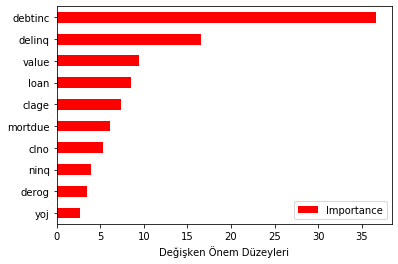

In [60]:
Importance.sort_values(by = "Importance", axis =0, ascending =True).plot(kind = "barh", color ="r")
plt.xlabel ("Değişken Önem Düzeyleri")

# GRADİENT BOOSTİNG

In [36]:
banka = pd.read_csv ("hmelq.csv")
df = banka.copy()
df = df.dropna()

In [37]:
dms = pd.get_dummies(df[['reason','job']])

In [38]:
y = df["bad"]
X = df.drop(["bad", "reason", "job"], axis =1)
X = pd.DataFrame(X)
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state =42)

In [39]:
from sklearn.ensemble import GradientBoostingClassifier

In [40]:
gbm_model = GradientBoostingClassifier ().fit (X_train, y_train)

In [41]:
y_pred = gbm_model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9471947194719472

In [42]:
gbm_params= {"learning_rate": [0.0001, 0.01, 0.1, 0.05], 
             "n_estimators": [10,50,100], 
             "max_depth": [3,5,10],
             "min_samples_split": [2,5,10]}

In [43]:
gbm = GradientBoostingClassifier()
gbm_cv = GridSearchCV (gbm, gbm_params, cv =10, n_jobs= -1, verbose =5)

In [44]:
gbm_cv.fit(X_train, y_train)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 446 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:  3.9min
[Parallel(n_jobs=-1)]: Done 878 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed:  7.6min finished


GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...e=None,
                                                  presort='au

In [45]:
print ("En iyi parametreler: " + str (gbm_cv.best_params_))

En iyi parametreler: {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 50}


In [46]:
gbm = GradientBoostingClassifier (learning_rate = 0.1, n_estimators = 50, max_depth=10, min_samples_split = 5)

In [47]:
gbm_tuned = gbm.fit(X_train, y_train)

In [48]:
y_pred =gbm_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.9521452145214522

In [49]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       554
           1       0.90      0.50      0.64        52

    accuracy                           0.95       606
   macro avg       0.93      0.75      0.81       606
weighted avg       0.95      0.95      0.95       606

